# Анализ рынка недвижимости Санкт-Петербурга.

**Описание проекта:**</b>
<br>Имеются данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Задача:**</b>
<br>Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Данные:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м).
- balcony — число балконов.
- ceiling_height — высота потолков (м).
- cityCenters_nearest — расстояние до центра города (м).
- days_exposition — сколько дней было размещено объявление (от публикации до снятия).
- first_day_exposition — дата публикации.
- floor — этаж.
- floors_total — всего этажей в доме.
- is_apartment — апартаменты (булев тип).
- kitchen_area — площадь кухни в квадратных метрах (м²).
- last_price — цена на момент снятия с публикации.
- living_area — жилая площадь в квадратных метрах (м²).
- locality_name — название населённого пункта.
- open_plan — свободная планировка (булев тип).
- parks_around3000 — число парков в радиусе 3 км.
- parks_nearest — расстояние до ближайшего парка (м).
- ponds_around3000 — число водоёмов в радиусе 3 км.
- ponds_nearest — расстояние до ближайшего водоёма (м).
- rooms — число комнат.
- studio — квартира-студия (булев тип).
- total_area — площадь квартиры в квадратных метрах (м²).
- total_images — число фотографий квартиры в объявлении.

### Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv")

Загружаем pandas, загружаем данные и пробуем их открыть. Выводим первые 10 строк.

In [3]:
data.head (10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Поскольку данные слились в одну строку, добавляем разделитель и снова выводим первые 10 строк.

In [4]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [5]:
data.head (10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию о таблице.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

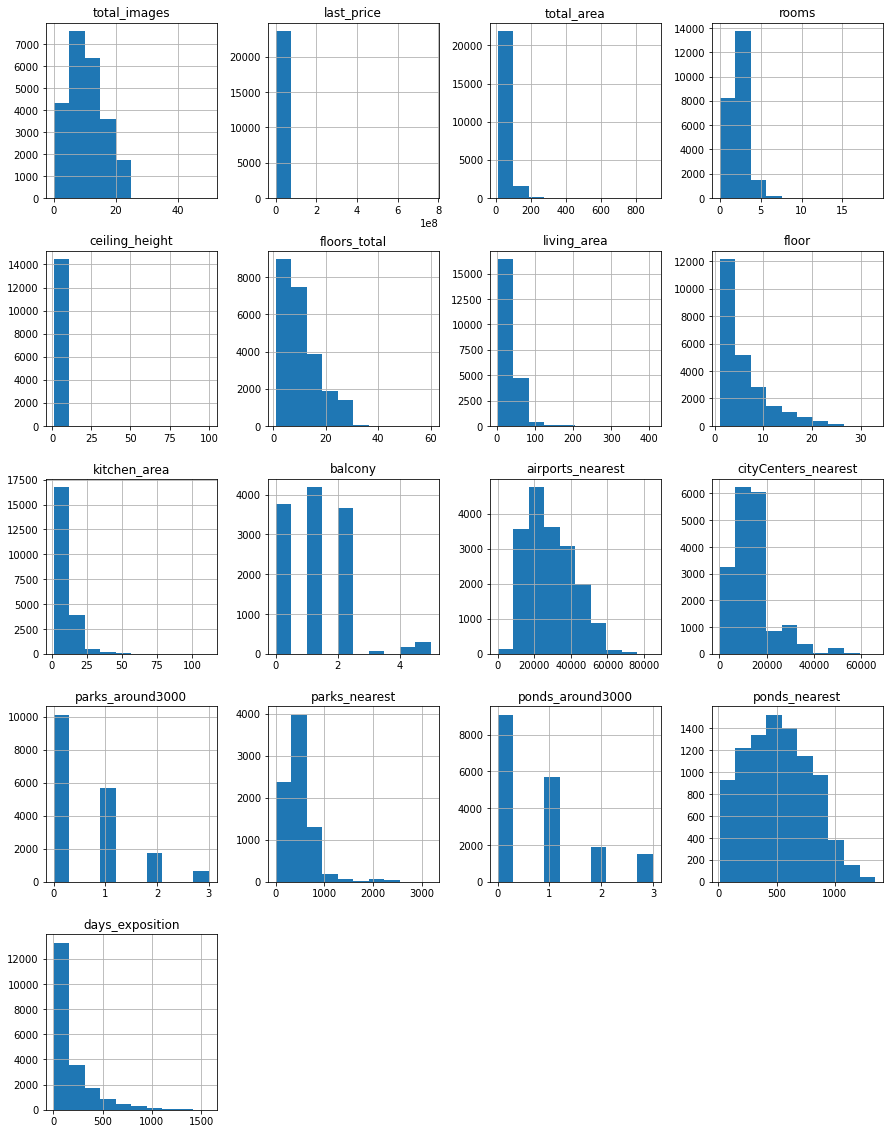

In [7]:
data.hist(figsize=(15, 20))

Данные характеризуются большим количеством пропусков, неоднородностью и сильными всплесками на гистограммах. Также нужно исправить название столбца "cityCenters_nearest" по аналогии с другими столбцами.

### Предобработка данных

Для начала, исправим название столбца.

In [8]:
data = data.rename(columns = {"cityCenters_nearest": "city_centers_nearest"})

In [9]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В ряде столбцов обнаружены пропуски значений. Количество везде разное, от совсем малых значений (например, в столбцах "floors_total" и "locality_name"), до тех, что составляют более половины всех строк в таблице (например "is_apartment"). Причину нужно будет проверить отдельно. Однако сразу можно удалить строки в столбце "locality_name" ("Название населённого пункта"). Данный столбец является критически важным для определения цены, но количество пропусков здесь составляет, примерно, 0,2% от общего числа строк и их удаление никак не скажется на итоговом результате. Также можно рассмотреть вариант поменять значения в столбце "city_centers_nearest" ("Расстояние до центра города").

В столбце "city_centers_nearest" ("Расстояние до центра города") тоже есть пропущеные значения, которые здесь составляют около 23%. Это много и удалять эти строки нельзя. Кроме того, поскольку содержащиеся в нём данные сильно влияют на формирование цены квартиры, необходимо изучить этот столбец подробнее. При вычислении удаления от центра города, неизвестно какая точка берётся в качестве отсчёта. Поэтому примем за точку отсчёта условную границу центрального района. Менять здесь значение на среднее или медианное нет смысла. При отсутствии чётких критериев того, что подразумевается под центром города, это может привести к искажениям итогового результата. При этом, часть объявлений, действительно, может быть подана в центральном районе и их значение удаления от центра может быть равно нулю. Тем не менее, для начала нужно выяснить, в объявлениях из каких городов чаще всего бывают пропуски.

In [11]:
data.loc[data["city_centers_nearest"].isna(), "locality_name"]

5        городской посёлок Янино-1
8                   посёлок Мурино
12                       Сертолово
22                 деревня Кудрово
30                        Коммунар
                   ...            
23683         посёлок Дзержинского
23692                       Тихвин
23695                        Тосно
23696             село Рождествено
23698          поселок Новый Учхоз
Name: locality_name, Length: 5519, dtype: object

Пропуски в основном касаются небольших городов и посёлков. Вполне возможно, что для этих городов нет автоматического подсчёта расстояния от центра.

Уточним

In [12]:
data.query('locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


In [13]:
data.query('locality_name != "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.6,9.0,40.00,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Большинство объявлений поданы в Санкт-Петербурге. Для него более возможен вариант, что отсутствие данных расстояния от центра означает нахождение квартиры именно в Центральном районе. Также вероятнее всего для него лучше настроены все автоматически добавляемые картографические данные. Тем не менее, объявления из других населённых пунктов составляют около 33% от общего числа объявлений. Учитывая, что в отношении них нельзя утверждать то же, что и в отношении Санкт-Петербурга, при этом их доля составляет треть всех объявлений, лучше оставить данный столбец без изменений.

Теперь удалим пропуски в столбце "locality_name".

In [14]:
data = data.dropna(subset = ["locality_name"])

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

То же самое можно проделать и в отношении стобца "floors_total". Доля пропусков в нём составляет около 0,4% от общего числа.

In [16]:
data = data.dropna(subset = ["floors_total"])

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Рассмотрим пропуски в других столбцах.

Одно из самых больших значений пропусков есть в столбце "balcony" ("Число балконов).

In [18]:
data["balcony"]

0        NaN
1        2.0
2        0.0
3        0.0
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: balcony, Length: 23565, dtype: float64

In [19]:
data["balcony"].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Как видно, в этом столбце стоят одновременно и нулевые значения и значение "NaN". Кроме этого значения здесь дробные. Если говорить про отсутствие значений в этом столбце, а именно про значение "NaN", то скорее всего это означает, что либо данные не указаны, либо балкона, действительно нет, что вполне вероятно.

In [20]:
data["balcony"].count()

12090

In [21]:
data["balcony"].isna().sum()

11475

Судя по всему, значения в том столбце пропущены в большинстве строк. Видимо, действительно, или данные не были указаны, или балконы в этих объявлениях отсутствуют. Однако, учитывая, такое большое количество отсутствующих значений, возможен также вариант какой-то технической ошибки. Поскольку таких значений большинство и точных данных об их происхождении нет, удалять их нельзя. Медианым или средним значением их также не заменишь, поскольку наличие или отсутсвие балкона важный параметр, влияющий на цену квартиры, а значит любое неточное значение в этих данных может привести к серьёзным искажениям. Поэтому, данные в этом столбце остаются неизменными.
Тем не менее, удалим аномально бльшие значения в 4 и 5 балконов. Примем возможный вариант наличия 3 балконов в дорогих квартирах.

In [22]:
data["balcony"] = data["balcony"].fillna(0)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [24]:
data["balcony"] = pd.to_numeric(data["balcony"])

In [25]:
data["balcony"].unique()

array([0., 2., 1., 5., 4., 3.])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Что касается столбцов "airports_nearest", "parks_around3000", "parks_nearest", "ponds_around3000" и "ponds_nearest", то тут отсутвие значений объсняется, скорее всего, отсутствием данных. Вряд ли квартиры находятся прямо в аэропорту или в парке. Скорее всего, возможен вариант, что они находятся рядом. Однако, данное утверждение в отношении аэропорта спорно, учитывая, что, скорее всего, речь идёт об аэропорте "Пулково". Тем не менее, данные в них важны, однако менять их на какое-либо значение нельзя. Любого (среднего или медианного) значение будет очень приблизительным и в итоге приведёт к сильному искажению результата. Поэтому, в этих столбцах оставляем даные без изменений.

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Что касается столбца "ceiling_height" ("Высота потолков"), то тут число пропусков составляет, примерно, 38% от общего числа строк. Скорее всего, в этих объявлениях, она просто не была указана. Как показывает практика, люди не всегда её указывают, а иногда и не всегда точно её знают, так же как и не всегда обращают внимание на этот параметр при покупке квартиры.

In [28]:
data.loc[data["ceiling_height"] > 4, "ceiling_height"].value_counts()

4.20      10
27.00      8
4.50       7
25.00      7
4.10       3
4.40       3
8.00       3
4.19       2
4.45       2
4.70       2
5.30       2
32.00      2
4.15       1
4.14       1
5.80       1
5.60       1
8.30       1
5.20       1
6.00       1
10.30      1
100.00     1
4.30       1
4.37       1
14.00      1
26.00      1
4.25       1
24.00      1
4.65       1
4.80       1
22.60      1
5.50       1
20.00      1
5.00       1
4.90       1
27.50      1
4.06       1
Name: ceiling_height, dtype: int64

In [29]:
data.loc[data["ceiling_height"] < 2.5, "ceiling_height"].value_counts()

2.40    23
2.45    15
2.00    11
2.48     8
2.30     4
2.47     3
2.46     2
2.20     1
1.75     1
2.34     1
2.49     1
1.20     1
2.25     1
1.00     1
Name: ceiling_height, dtype: int64

In [30]:
data["ceiling_height"].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Как видно, разброс значений очень большой. Есть и аномальные значения типа 2 м или 27,5 м. Связано это, скорее всего, с ошибками при выгрузке, также не исключены и обычные ошибки при заполнении. Например, 27 м, это, вполне возможно 2,7 м. Однако, со стопроцентной уверенностью этого утверждать нельзя. Так как высота потолков редко бывает ниже 2,5 м, то удалим строки со значениями ниже этого показателя. Кроме этого, удалим строки, где высота потолков выше 4 м Учитывая, что стандартная высота этажа составляет, примерно 3-4 метра, такой показатель будет вполне подходящим. Оставим высокие потолки в 4 метра. Примем, что в объявлениях есть дорогие квартиры с такой высотой потолков. Пропуски заполним медианным значением.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [32]:
data["ceiling_height"] = data["ceiling_height"].fillna(data["ceiling_height"].median())

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [35]:
data["ceiling_height"].value_counts()

2.65     9758
2.50     3515
2.60     1645
2.70     1571
3.00     1108
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [36]:
data["ceiling_height"].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [37]:
data["ceiling_height"].min()

1.0

In [38]:
data["ceiling_height"].max()

100.0

In [39]:
data.loc[data["ceiling_height"] < 2.5, "ceiling_height"].value_counts()

2.40    23
2.45    15
2.00    11
2.48     8
2.30     4
2.47     3
2.46     2
2.20     1
1.75     1
2.34     1
2.49     1
1.20     1
2.25     1
1.00     1
Name: ceiling_height, dtype: int64

In [40]:
data.loc[data["ceiling_height"] > 4, "ceiling_height"].value_counts()

4.20      10
27.00      8
4.50       7
25.00      7
4.10       3
4.40       3
8.00       3
4.19       2
4.45       2
4.70       2
5.30       2
32.00      2
4.15       1
4.14       1
5.80       1
5.60       1
8.30       1
5.20       1
6.00       1
10.30      1
100.00     1
4.30       1
4.37       1
14.00      1
26.00      1
4.25       1
24.00      1
4.65       1
4.80       1
22.60      1
5.50       1
20.00      1
5.00       1
4.90       1
27.50      1
4.06       1
Name: ceiling_height, dtype: int64

Теперь обрежем аномальные значения. Оставим высоту потолков в диапазоне от 2,5 до 4 м.

In [41]:
data = data.loc[(data["ceiling_height"] >= 2.5) & (data["ceiling_height"] <= 4)]

In [42]:
data["ceiling_height"].min()

2.5

In [43]:
data["ceiling_height"].max()

4.0

In [44]:
data["ceiling_height"].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54, 2.51,
       2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92, 3.11,
       3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.79,
       2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 3.38, 3.01, 3.65, 3.9 , 3.18,
       3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37,
       3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84,
       3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 3.51, 3.93,
       3.42, 2.99, 3.49, 2.91, 3.88, 3.29, 3.76, 3.69, 2.89, 3.58, 3.48,
       3.59])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23417 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23417 non-null  int64  
 1   last_price            23417 non-null  float64
 2   total_area            23417 non-null  float64
 3   first_day_exposition  23417 non-null  object 
 4   rooms                 23417 non-null  int64  
 5   ceiling_height        23417 non-null  float64
 6   floors_total          23417 non-null  float64
 7   living_area           21564 non-null  float64
 8   floor                 23417 non-null  int64  
 9   is_apartment          2727 non-null   object 
 10  studio                23417 non-null  bool   
 11  open_plan             23417 non-null  bool   
 12  kitchen_area          21215 non-null  float64
 13  balcony               23417 non-null  float64
 14  locality_name         23417 non-null  object 
 15  airports_nearest   

In [46]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1853
floor                       0
is_apartment            20690
studio                      0
open_plan                   0
kitchen_area             2202
balcony                     0
locality_name               0
airports_nearest         5476
city_centers_nearest     5456
parks_around3000         5455
parks_nearest           15450
ponds_around3000         5455
ponds_nearest           14441
days_exposition          3147
dtype: int64

Перезапишем индексы после удаления строк.

In [47]:
data = data.reset_index(drop=True)

In [48]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23413,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23414,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23415,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23417 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23417 non-null  int64  
 1   last_price            23417 non-null  float64
 2   total_area            23417 non-null  float64
 3   first_day_exposition  23417 non-null  object 
 4   rooms                 23417 non-null  int64  
 5   ceiling_height        23417 non-null  float64
 6   floors_total          23417 non-null  float64
 7   living_area           21564 non-null  float64
 8   floor                 23417 non-null  int64  
 9   is_apartment          2727 non-null   object 
 10  studio                23417 non-null  bool   
 11  open_plan             23417 non-null  bool   
 12  kitchen_area          21215 non-null  float64
 13  balcony               23417 non-null  float64
 14  locality_name         23417 non-null  object 
 15  airports_nearest   

Далее. Пропуски находятся в столбце "living_area" ("Жилая площадь"), где содержатся важные данные, влияющие на образование цены квартиры. Основным определющим фактором ценнобразования является общая площадь, далее идёт количество комнат и жилая площадь. Поэтому, данные в этом столбце очень важны.

In [50]:
data["living_area"].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [51]:
data["living_area"].value_counts()

18.00    879
17.00    668
30.00    593
16.00    482
20.00    476
        ... 
54.43      1
86.10      1
99.70      1
29.74      1
16.74      1
Name: living_area, Length: 1762, dtype: int64

Здесь разброс значений также очень большой, однако все значения вполне приемлемы, жилая площадь квартиры может быть и 18, и 250 кв. м. Однако, поскольку этот параметр самый важный, то оставлять пустые или нулевые значения здесь нельзя, поскольку жилая площадь не может быть равна нулю. Медианное или среднее значение здесь тоже не подойдёт, т.к. разница между крайними значениями очень большая и любое подсчитанное значение может быть неточным и искажать результат. При этом, доля пропусков составляет около 3,3%. Вызываны они, скорее всего, технической ошибкой и не могут быть заменены приемлемым значением, однако, чтобы не потреять данные в других столбцах, не будем их удалять.

In [52]:
data["living_area"].min()

2.0

In [53]:
data.loc[data["living_area"] < 12.0, "living_area"].value_counts()

10.00    31
11.00    20
9.00      9
10.50     5
11.50     5
11.40     4
10.40     3
11.30     3
11.70     3
8.00      2
10.60     2
10.70     2
10.30     2
10.08     2
10.90     2
11.10     2
3.00      2
2.00      2
11.20     2
11.60     2
11.90     1
9.10      1
11.79     1
11.15     1
10.80     1
6.00      1
8.30      1
8.40      1
10.76     1
9.80      1
11.88     1
5.00      1
10.94     1
11.47     1
10.93     1
6.50      1
10.55     1
8.90      1
11.99     1
8.50      1
11.38     1
5.40      1
10.52     1
Name: living_area, dtype: int64

Таких значений быть не может. Может быть жилая площадь 200 кв .м, но не 2 кв м. Санузел больше. Удалим эти значения. Примем за минимально возможную жилую площадь 12 кв. м.

In [54]:
data["living_area"] = data.loc[data["living_area"] >= 12.0, "living_area"]

In [55]:
data["living_area"].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [56]:
data["living_area"].min()

12.0

Сразу восстановим индексы.

In [57]:
data = data.reset_index(drop=True)

Чтобы избавиться от слишком длинных дробей, округлим значения.

In [58]:
data["living_area"] = data["living_area"].round(1)

In [59]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23413,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23414,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23415,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [60]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1981
floor                       0
is_apartment            20690
studio                      0
open_plan                   0
kitchen_area             2202
balcony                     0
locality_name               0
airports_nearest         5476
city_centers_nearest     5456
parks_around3000         5455
parks_nearest           15450
ponds_around3000         5455
ponds_nearest           14441
days_exposition          3147
dtype: int64

Пропуски удалены. Значения округлены.

Поскольку проверяли жилую площадь, которая является важным значением, для формирования цены квартиры, рассмотрим второй такой же показатель, это наличие комнат.

In [61]:
data["rooms"].value_counts()

1     7967
2     7844
3     5742
4     1165
5      318
0      192
6      101
7       57
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [62]:
data["rooms"].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Есть здесь несколько странных значений типа "0" или большого количества комнат. В принципе, в дорогой недвижимости комнат может быть много, тем не менее, тут не исключена также и обычная ошибка. Со стопроцентной уверенностью утверждать, что это ошибка или аномальное значение нельзя, поэтому оставим эти значения.

Однако, в количестве комнат не может быть значение "0". Возможно, тут подразумевается студия или некая "свободная планировка".

In [63]:
data.loc[(data["rooms"] == 0) & (data["studio"] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
434,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.8,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
599,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,NaN,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
686,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.5,21,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
705,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.0,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22595,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.2,5,NaN,...,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22604,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.0,10,NaN,...,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
22933,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.0,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23274,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,NaN,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [64]:
data.loc[(data["rooms"] == 0) & (data["open_plan"] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
344,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
500,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
769,9,2600000.0,26.10,2018-02-20T00:00:00,0,2.65,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
828,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
935,5,2200000.0,23.00,2016-09-27T00:00:00,0,2.65,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1554,0,2200000.0,22.00,2017-11-03T00:00:00,0,2.65,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1604,7,1980000.0,23.98,2018-02-01T00:00:00,0,2.65,4.0,NaN,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2505,5,3500000.0,27.10,2018-02-01T00:00:00,0,2.65,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
2982,18,2100000.0,24.00,2017-11-10T00:00:00,0,2.65,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4068,7,2600000.0,24.00,2018-02-01T00:00:00,0,2.65,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Как видно, значение "0" соответствует квартире-студии и "свободной планировке". Это не совсем верно, но удалять эти значения также не имеет смысла.

Теперь проверим пропуски в столбце "is_apartment" ("Апартаменты").

In [65]:
data["is_apartment"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23412    NaN
23413    NaN
23414    NaN
23415    NaN
23416    NaN
Name: is_apartment, Length: 23417, dtype: object

Число пропусков здесь составляет большинство значений. Связано это с несколькими причинами. Во-первых, апартаменты - не самый распространённый тип недвижимости. Во-вторых, люди не всегда понимают, что это такое и поэтому оставляют значение этой строки пустым. Поэтому, пока оставим этот столбец без изменений.

Значения в столбце "kitchen_area" ("Площадь кухни") также являются важными. Но, поскольку площадь кухни соотносится с общей и жилой площадью, то замена пустых значений на средние или медианные приведёт к неточностям. При этом, доля пропусков в этом столбце составляет примерно 2,9%.

In [66]:
data["kitchen_area"] = data["kitchen_area"].fillna(0)

In [67]:
data = data.reset_index(drop=True)

In [68]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1981
floor                       0
is_apartment            20690
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5476
city_centers_nearest     5456
parks_around3000         5455
parks_nearest           15450
ponds_around3000         5455
ponds_nearest           14441
days_exposition          3147
dtype: int64

Что касается пропусков в столбце "days_exposition" (Время которое объявление было размещено), то они могут быть связаны с разными причинами и одна из наиболее вероятных эта та, что объявление до сих пор не снято с публикации. При этом, на конечный результат данные в этом столбце существенного влияния не оказывают. Учитывая изложенное, что-либо изменять в этом стобце нет необхоимости. 

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23417 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23417 non-null  int64  
 1   last_price            23417 non-null  float64
 2   total_area            23417 non-null  float64
 3   first_day_exposition  23417 non-null  object 
 4   rooms                 23417 non-null  int64  
 5   ceiling_height        23417 non-null  float64
 6   floors_total          23417 non-null  float64
 7   living_area           21436 non-null  float64
 8   floor                 23417 non-null  int64  
 9   is_apartment          2727 non-null   object 
 10  studio                23417 non-null  bool   
 11  open_plan             23417 non-null  bool   
 12  kitchen_area          23417 non-null  float64
 13  balcony               23417 non-null  float64
 14  locality_name         23417 non-null  object 
 15  airports_nearest   

В итоге, после обработки пустых значений, размер таблицы значительно сократился, однако, теперь она представляет гораздо более удобные для дальнейшей работы данные и вероятность искажения конечного результата также значительно ниже.

В таблице, в некоторых столбцах, неверно указан тип данных. Это "first_day_exposition" ("Дата публикации"), "floors_total" ("Количество этажей в доме"), "is_apartment" ("Апартаменты"), "balcony" ("Количество балконов") и "days_exposition" ("Сколько дней было размещено объявление").

In [70]:
data["first_day_exposition"] = pd.to_datetime(
    data["first_day_exposition"], format= "%Y-%m-%d %H:%M:%S")

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23417 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23417 non-null  int64         
 1   last_price            23417 non-null  float64       
 2   total_area            23417 non-null  float64       
 3   first_day_exposition  23417 non-null  datetime64[ns]
 4   rooms                 23417 non-null  int64         
 5   ceiling_height        23417 non-null  float64       
 6   floors_total          23417 non-null  float64       
 7   living_area           21436 non-null  float64       
 8   floor                 23417 non-null  int64         
 9   is_apartment          2727 non-null   object        
 10  studio                23417 non-null  bool          
 11  open_plan             23417 non-null  bool          
 12  kitchen_area          23417 non-null  float64       
 13  balcony         

Поменяли тип в стобце "first_day_exposition".

In [72]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,NaN,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.4,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Количество этаже в доме также должно быть целым числом.

In [73]:
data["floors_total"] = data["floors_total"].astype("int")

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23417 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23417 non-null  int64         
 1   last_price            23417 non-null  float64       
 2   total_area            23417 non-null  float64       
 3   first_day_exposition  23417 non-null  datetime64[ns]
 4   rooms                 23417 non-null  int64         
 5   ceiling_height        23417 non-null  float64       
 6   floors_total          23417 non-null  int64         
 7   living_area           21436 non-null  float64       
 8   floor                 23417 non-null  int64         
 9   is_apartment          2727 non-null   object        
 10  studio                23417 non-null  bool          
 11  open_plan             23417 non-null  bool          
 12  kitchen_area          23417 non-null  float64       
 13  balcony         

In [75]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Тип исправлен. Большой необходимости в этом не было, но для порядка и более удобного отображения таблицы, это нужно было сделать.

Тоже самое сделаем в отношении столбца с количеством балконов.

In [76]:
data["balcony"] = data["balcony"].astype("int")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23417 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23417 non-null  int64         
 1   last_price            23417 non-null  float64       
 2   total_area            23417 non-null  float64       
 3   first_day_exposition  23417 non-null  datetime64[ns]
 4   rooms                 23417 non-null  int64         
 5   ceiling_height        23417 non-null  float64       
 6   floors_total          23417 non-null  int64         
 7   living_area           21436 non-null  float64       
 8   floor                 23417 non-null  int64         
 9   is_apartment          2727 non-null   object        
 10  studio                23417 non-null  bool          
 11  open_plan             23417 non-null  bool          
 12  kitchen_area          23417 non-null  float64       
 13  balcony         

In [78]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,0.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Тип исправлен на целое число.

Что касается столбца "Апартаменты", то изначально здесь предполагался булев тип. Однако, из-за наличия пропусков (наличия значения "NaN"), такой тип установить не получится. При попытке это сделать, значения "NaN" исчезнут и данные исказятся. Кроме этого столбец не яляется очень важным для расчётов. Поэтому оставим его без изменений.

То же самое касается и столбца "days_exposition", где обозначено сколько дней было размещено объявление. Здесь должно быть целое число, но из-за наличия значения "NaN", указано, что тут дробные числа. Также из-за значения "NaN" нельзя поменять тип с дробных чисел на целые. Поэтому, также оставим данные без изменений и в этом столбце.

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23417 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23417 non-null  int64         
 1   last_price            23417 non-null  float64       
 2   total_area            23417 non-null  float64       
 3   first_day_exposition  23417 non-null  datetime64[ns]
 4   rooms                 23417 non-null  int64         
 5   ceiling_height        23417 non-null  float64       
 6   floors_total          23417 non-null  int64         
 7   living_area           21436 non-null  float64       
 8   floor                 23417 non-null  int64         
 9   is_apartment          2727 non-null   object        
 10  studio                23417 non-null  bool          
 11  open_plan             23417 non-null  bool          
 12  kitchen_area          23417 non-null  float64       
 13  balcony         

Теперь проверим наличие дубликатов в таблице.

In [80]:
data.duplicated().sum()

0

Поскольку расположение квартиры идентифицируется именно по адресу (всё остальное: площадь, количество комнат, этаж и т.д. - техническая информация, которая может повторяться), то проверим наличие дубликатов в столбце "locality_name" (название населённого пункта).

In [81]:
data["locality_name"].duplicated().sum()

23055

За дубликаты он подсчитал, практически, все строки. Результат не верен. Явных дубликатов, скорее всего, действительно, нет в таблице. Поищем неявные.

In [82]:
data["locality_name"].value_counts()

Санкт-Петербург                     15560
посёлок Мурино                        518
посёлок Шушары                        439
Всеволожск                            396
Пушкин                                365
                                    ...  
садовое товарищество Новая Ропша        1
садовое товарищество Садко              1
поселок Лисий Нос                       1
деревня Реброво                         1
деревня Чудской Бор                     1
Name: locality_name, Length: 362, dtype: int64

In [83]:
data["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Есть в этом столбце много разных названий вида населённого пункта типа: "поселок", "посёлок", "городской посёлок", "посёлок гороского типа" и т.д. Есть также дубликаты. Например: "городской посёлок Янино-1" и "городской поселок Янино-1".

In [84]:
data["locality_name"] = data["locality_name"].str.replace("городской поселок", "Посёлок городского типа")
data["locality_name"] = data["locality_name"].str.replace("городской посёлок", "Посёлок городского типа")
data["locality_name"] = data["locality_name"].str.replace("Поселок городского типа", "Посёлок городского типа")
data["locality_name"] = data["locality_name"].str.replace("поселок городского типа", "Посёлок городского типа")
data["locality_name"] = data["locality_name"].str.replace("посёлок городского типа", "Посёлок городского типа")
data["locality_name"] = data["locality_name"].str.replace("поселок", "Посёлок")
data["locality_name"] = data["locality_name"].str.replace("посёлок", "Посёлок")
data["locality_name"] = data["locality_name"].str.replace("Поселок", "Посёлок")
data["locality_name"] = data["locality_name"].str.replace("деревня", "Деревня")
data["locality_name"] = data["locality_name"].str.replace("село", "Село")

In [85]:
data["locality_name"].value_counts()

Санкт-Петербург                       15560
Посёлок Мурино                          550
Посёлок Шушары                          439
Всеволожск                              396
Пушкин                                  365
                                      ...  
садовое товарищество Садко                1
коттеджный Посёлок Кивеннапа Север        1
Посёлок станции Лужайка                   1
Посёлок Кирпичное                         1
Деревня Кривко                            1
Name: locality_name, Length: 321, dtype: int64

In [86]:
data["locality_name"].unique()

array(['Санкт-Петербург', 'Посёлок Шушары',
       'Посёлок городского типа Янино-1', 'Посёлок Парголово',
       'Посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Деревня Кудрово', 'Коммунар', 'Колпино',
       'Посёлок городского типа Красный Бор', 'Гатчина',
       'Деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'Деревня Новое Девяткино', 'Посёлок Металлострой',
       'Посёлок городского типа Лебяжье',
       'Посёлок городского типа Сиверский', 'Посёлок Молодцово',
       'Посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'Деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Деревня Куттузи', 'Посёлок Аннино',
       'Посёлок городского типа Ефимовский', 'Посёлок Плодовое',
       'Деревня Заклинье', 'Посёлок Торковичи', 'Посёлок Первомайское',
       'Красное Село', 'Посёлок Понтонный', 'Сясьстрой', 'Деревня Старая',
       'Деревня Лесколово', 'Сланц

In [87]:
data["locality_name"] = data["locality_name"].str.replace("коттеджный Посёлок", "Коттеджный посёлок")

In [88]:
data["locality_name"].unique()

array(['Санкт-Петербург', 'Посёлок Шушары',
       'Посёлок городского типа Янино-1', 'Посёлок Парголово',
       'Посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Деревня Кудрово', 'Коммунар', 'Колпино',
       'Посёлок городского типа Красный Бор', 'Гатчина',
       'Деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'Деревня Новое Девяткино', 'Посёлок Металлострой',
       'Посёлок городского типа Лебяжье',
       'Посёлок городского типа Сиверский', 'Посёлок Молодцово',
       'Посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'Деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Деревня Куттузи', 'Посёлок Аннино',
       'Посёлок городского типа Ефимовский', 'Посёлок Плодовое',
       'Деревня Заклинье', 'Посёлок Торковичи', 'Посёлок Первомайское',
       'Красное Село', 'Посёлок Понтонный', 'Сясьстрой', 'Деревня Старая',
       'Деревня Лесколово', 'Сланц

Дубликаты убраны, все названия исправлены.

Пройдёмся также по столбцам "last_price", "total_area", "rooms".

In [89]:
data["last_price"].value_counts()

4500000.0     341
3500000.0     289
4300000.0     259
4000000.0     258
4200000.0     257
             ... 
86738800.0      1
10430000.0      1
9917600.0       1
3180500.0       1
4386000.0       1
Name: last_price, Length: 2910, dtype: int64

In [90]:
data["last_price"].min()

12190.0

In [91]:
data["last_price"].max()

763000000.0

12190 - это явная ошибка. Возможно, техническая и тут нужно обратиться к соответствующим специалистам, чтобы проверили данные. Но вполне возможен также и вариант ошибки в записи. Некоторые 12190000 могут записать так, как записано в столбце. Сложно сказать, какое значение будет подходящим как минимально возможное. Для этого нужно анализировать рынок недвижимости Санкт-Петербурга и Ленинградской области. Примем за такое 500000 руб.

Что касается больших значений, то тут сложнее. Такая цена может быть. Конечно, 420 млн. - это маловероятная цена, но со стопроцентной уверенностью утверждать то, что этого не может быть тоже нельзя. Также корректно заменить её на что-то тоже не представляется возможным. Поэтому оставим большие значения цены без изменений. Это может привести к возможным выбросам и смещению вправо средней и медианы, но в противном случае может быть неточный результат.

In [92]:
data.loc[data["last_price"] < 500000, "last_price"].value_counts()

450000.0    4
470000.0    3
430000.0    2
490000.0    2
12190.0     1
440000.0    1
480000.0    1
Name: last_price, dtype: int64

Комментарий студента:</b>
Значения меньше 500000 руб. можно удалить.

In [93]:
data["last_price"] = data.loc[data["last_price"] >= 500000, "last_price"]

In [94]:
data["last_price"].value_counts()

4500000.0     341
3500000.0     289
4300000.0     259
4000000.0     258
4200000.0     257
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2903, dtype: int64

In [95]:
data["last_price"].min()

500000.0

In [96]:
data["last_price"].max()

763000000.0

Общая площадь.

In [97]:
data["total_area"].value_counts()

45.00     412
42.00     379
31.00     345
60.00     344
44.00     341
         ... 
37.92       1
115.60      1
117.40      1
62.34       1
55.06       1
Name: total_area, Length: 2150, dtype: int64

In [98]:
data["total_area"].min()

12.0

In [99]:
data["total_area"].max()

900.0

Что касается общей площади, то 12 кв. м вряд ли возможны. Она редко бывает меньше 28-30 кв. м. Всё, что меньше, скорее всего, ошибка. Очень большие значения трогать не будем. Как и в случае с очень высокой ценой, они вполне возможны. Например квартира 900 кв. м в центре Санкт-Петербурга может стоить 420000000 руб.

In [100]:
data.loc[data["total_area"] < 28, "total_area"].value_counts()

25.00    42
27.00    35
26.00    34
24.00    27
23.00    19
         ..
27.11     1
18.90     1
24.30     1
23.29     1
21.89     1
Name: total_area, Length: 119, dtype: int64

Тем не менее, значений таких достаточно много. Но скорее всего, они связаны с ошибкой в заполнении. В типовой планировке самая маленькая общая площадь 1-комнатной квартиры - 28 кв. м. Возьмём за минимальное значение 27 кв. м, остальное удалим, чтобы они не влияли на расчёт цены 1 кв. м.

In [101]:
data["total_area"] = data.loc[data["total_area"] >= 27, "total_area"]

In [102]:
data["total_area"].min()

27.0

Количество комнат.

In [103]:
data["rooms"].value_counts()

1     7967
2     7844
3     5742
4     1165
5      318
0      192
6      101
7       57
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Ранее уже рассматривали этот столбец. Нулевого значения тут быть не может, однако было установлено, что это значение связано с так называемой "свободной планировкой" или студией. Я повторю это исследование.

In [104]:
data.loc[data["rooms"] == 0, "rooms"].count()

192

In [105]:
data.loc[(data["rooms"] == 0) & (data["studio"] == True)]["rooms"].count()

134

In [106]:
data.loc[(data["rooms"] == 0) & (data["open_plan"] == True)]["rooms"].count()

58

Как видно, нулевые значения в этом столбце соответствуют значению в столбцах "Студия" или "Свободная планиовка". Что касается больших значений, то однозначно утверждать, что это ошибка нельзя. В квартире площадью 900 кв. м вполне может быть 10 а то и больше комнат. Учитывая также, что, в основном, на формирование цены квартиры оказывает влияние общая площадь, то удалять большие значения в этом столбце не будем.

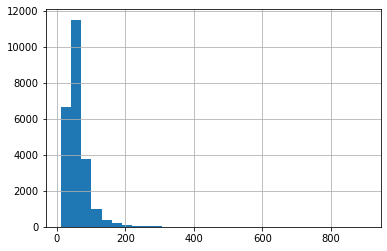

In [107]:
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

Однако, на графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300 м. Значит эти значения нужно отбросить.

Ещё раз поправим общую площадь. Уберём большие значения, те, что больше 200 кв. м. После этого должно измениться и количество комнат, а также средние показатели.

In [108]:
data = data.loc[(data["total_area"] >= 27) & (data["total_area"] <= 200)]

In [109]:
data["total_area"].min()

27.0

In [110]:
data["total_area"].max()

200.0

Площадь скорректирована. Пройдёмся ещё раз по количеству комнат.

In [111]:
data["rooms"].value_counts()

2     7842
1     7761
3     5728
4     1126
5      264
0       88
6       60
7       20
8        2
11       2
Name: rooms, dtype: int64

In [112]:
data.loc[data["rooms"] == 0, "rooms"].count()

88

In [113]:
data.loc[(data["rooms"] == 0) & (data["studio"] == True)]["rooms"].count()

61

In [114]:
data.loc[(data["rooms"] == 0) & (data["open_plan"] == True)]["rooms"].count()

27

In [115]:
data["rooms"].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8])

In [116]:
data.loc[data["rooms"] > 5, "rooms"].value_counts()

6     60
7     20
8      2
11     2
Name: rooms, dtype: int64

Количество комнат также изменилось. Однако осталось несколько необычно больших значений. Их не очень много и, скорее всего, они соответствуют большим значениям общей площади. Удалять их не нужно.

Нулевые значения есть также и в столбце "Площадь кухни". Проверим его. Возможно, тут также имеются ввиду студии и "свободная планировка".

In [117]:
data.loc[data["kitchen_area"] == 0, "kitchen_area"].count()

1935

In [118]:
data.loc[(data["kitchen_area"] == 0) & (data["studio"] == True)]["kitchen_area"].count()

67

In [119]:
data.loc[(data["kitchen_area"] == 0) & (data["open_plan"] == True)]["kitchen_area"].count()

35

Нулевые значения не связаны со студией и "свободной планировкой".

In [120]:
data["kitchen_area"].unique()

array([25.  , 11.  ,  8.3 ,  0.  , 41.  ,  9.1 , 14.4 , 18.9 ,  8.81,
        6.5 ,  8.5 ,  6.  ,  9.  ,  5.2 ,  8.  ,  7.6 ,  5.6 , 12.  ,
        5.7 ,  6.1 , 19.6 , 15.  ,  7.  ,  9.2 , 11.7 , 13.4 , 17.  ,
        6.3 , 11.6 ,  8.8 , 10.  , 17.6 ,  7.5 ,  9.5 , 50.  , 15.5 ,
       10.7 , 11.1 , 20.  , 11.9 , 16.  ,  5.3 , 11.5 ,  7.2 ,  6.2 ,
       10.4 ,  7.1 ,  4.9 ,  7.3 , 11.95, 10.2 ,  6.4 ,  5.5 , 13.  ,
        8.4 , 23.6 , 10.8 , 18.3 ,  5.  ,  8.2 , 24.  , 23.8 ,  6.6 ,
       26.85, 15.4 ,  7.8 , 33.8 ,  5.4 , 12.72, 19.  , 12.4 ,  7.9 ,
       10.3 ,  9.8 , 17.5 , 14.7 , 20.91, 21.3 , 10.6 , 10.9 ,  9.7 ,
        7.7 , 12.5 , 11.4 ,  8.6 , 11.24, 14.1 , 15.7 , 13.29, 14.  ,
       12.9 , 12.7 , 16.5 ,  9.36, 21.5 , 35.  , 10.5 ,  8.7 , 19.3 ,
       21.4 , 40.  , 49.2 , 11.52,  8.9 ,  9.6 , 30.  , 14.2 ,  8.1 ,
       10.44,  4.5 , 16.3 , 11.2 , 18.4 ,  7.4 , 11.3 ,  9.4 , 13.1 ,
       10.19,  7.06, 22.  , 36.  ,  5.1 , 18.7 ,  9.9 , 14.3 , 18.  ,
       23.  , 19.4 ,

Самая маленькая стандартная кухня - это 6-8 кв. м. Максимальный размер кухни может быть разным, особенно в дорогих новостройках. Может быть и 20 кв. м.

In [121]:
data.loc[data["kitchen_area"] < 6.0, "kitchen_area"].value_counts()

0.00    1935
5.50     395
5.00     340
5.40     135
5.60     135
        ... 
5.28       1
5.35       1
5.31       1
5.86       1
5.65       1
Name: kitchen_area, Length: 61, dtype: int64

In [122]:
data.loc[data["kitchen_area"] > 20, "kitchen_area"].value_counts()

25.0    56
30.0    53
22.0    50
23.0    36
21.0    34
        ..
42.6     1
27.2     1
37.8     1
27.5     1
29.8     1
Name: kitchen_area, Length: 244, dtype: int64

In [123]:
data["kitchen_area"].min()

0.0

In [124]:
data["kitchen_area"].max()

93.2

Много значений, выходящих за рамки стандартных. Удалять их нельзя. Также ранее было принято решение оставить нулевые значения. Максимальное значение в 93,2 кв. м очень необычно, но, возможно, относится к дорогим квартирам с необычной планровкой.

### Посчитайте и добавьте в таблицу новые столбцы

In [125]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.00,2,Посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,0.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,9.10,0,Посёлок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,14.40,1,Посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,8.81,0,Посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22893 entries, 0 to 23416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22893 non-null  int64         
 1   last_price            22879 non-null  float64       
 2   total_area            22893 non-null  float64       
 3   first_day_exposition  22893 non-null  datetime64[ns]
 4   rooms                 22893 non-null  int64         
 5   ceiling_height        22893 non-null  float64       
 6   floors_total          22893 non-null  int64         
 7   living_area           21005 non-null  float64       
 8   floor                 22893 non-null  int64         
 9   is_apartment          2675 non-null   object        
 10  studio                22893 non-null  bool          
 11  open_plan             22893 non-null  bool          
 12  kitchen_area          22893 non-null  float64       
 13  balcony         

Добавим столбец с ценой одного квадратного метра. Она получается делением цены квартиры на общую площадь.

In [127]:
data["price_avg"] = data["last_price"] / data["total_area"]

In [128]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,2,Посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,0,Посёлок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,1,Посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,0,Посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164


In [129]:
data["price_avg"].head(10)

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
6     99195.710456
7    110544.692737
8     87454.764777
9     88524.590164
Name: price_avg, dtype: float64

Округлим значения.

In [130]:
data["price_avg"] = data["price_avg"].round(1)

In [131]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,2,Посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,0,Посёлок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,1,Посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,0,Посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.8
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6


Добавим столбец с днём публикации объявления.

In [132]:
data["week_day"] = data["first_day_exposition"].dt.weekday

In [133]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg,week_day
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,Посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,Посёлок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,Посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,Посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6


Столбец добавлен.

In [134]:
data["month"] = data["first_day_exposition"].dt.month

In [135]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg,week_day,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,9
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,11
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,4
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,2,5
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,2


In [136]:
data["year"] = data["first_day_exposition"].dt.year

In [137]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg,week_day,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,2,2017


Добавлены также столбцы с месяцем и годом публикации объявления.

Добавим столбец с типом этажа.

In [138]:
def floor_type (row):
    floor = row["floor"]
    floors_total = row["floors_total"]
    if floor == 1:
        return "Первый"
    if floor == floors_total:
        return "Последний"
    else:
        return "Другой"
data["floor_type"] = data.apply(floor_type, axis=1)

In [139]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg,week_day,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,0.0,NaN,0.0,NaN,155.0,99195.7,3,11,2017,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,0.0,NaN,0.0,NaN,NaN,110544.7,3,4,2019,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,NaN,NaN,NaN,NaN,189.0,87454.8,2,5,2018,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,0.0,NaN,0.0,NaN,289.0,88524.6,6,2,2017,Другой


Добавим в таблицу столбец с расстоянием до центра города в км. Данные округлим до целых значений.

In [140]:
data["centers_nearest_km"] = data["city_centers_nearest"] / 1000

In [141]:
data["centers_nearest_km"] = data["centers_nearest_km"].round()

In [142]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_avg,week_day,month,year,floor_type,centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,Другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,Первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,Другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,Другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,NaN,55.0,95065.8,0,9,2018,Другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,NaN,6,NaN,...,NaN,0.0,NaN,155.0,99195.7,3,11,2017,Другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,NaN,0.0,NaN,NaN,110544.7,3,4,2019,Другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.4,26,NaN,...,NaN,NaN,NaN,189.0,87454.8,2,5,2018,Другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,NaN,0.0,NaN,289.0,88524.6,6,2,2017,Другой,15.0


Добавлен столбец, но на мой взгляд, смысла в этом не было. Проще было изменить данные в столбце "city_centers_nearest".

### Проведите исследовательский анализ данных

Построим гистограммы.

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22893 entries, 0 to 23416
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22893 non-null  int64         
 1   last_price            22879 non-null  float64       
 2   total_area            22893 non-null  float64       
 3   first_day_exposition  22893 non-null  datetime64[ns]
 4   rooms                 22893 non-null  int64         
 5   ceiling_height        22893 non-null  float64       
 6   floors_total          22893 non-null  int64         
 7   living_area           21005 non-null  float64       
 8   floor                 22893 non-null  int64         
 9   is_apartment          2675 non-null   object        
 10  studio                22893 non-null  bool          
 11  open_plan             22893 non-null  bool          
 12  kitchen_area          22893 non-null  float64       
 13  balcony         

**Сортировка по общей площади.**

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

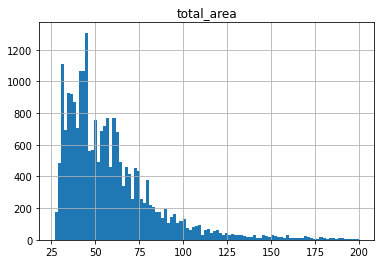

In [144]:
data.hist(column = "total_area", bins = 100)

Большинство значений в районе 45 кв. м. На втором месте квартиры около 30 кв. м. В принципе, стандартная площадь для 1-комнатных и 2-комнатных квартир, которых большинство. Есть длинный "хвост" от 200 до 400 кв. м. Их значение стремится к нулю. Что, в общем, логично. Это дорогие квартиры и их немного.

**Сортировка по жилой площади.**

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

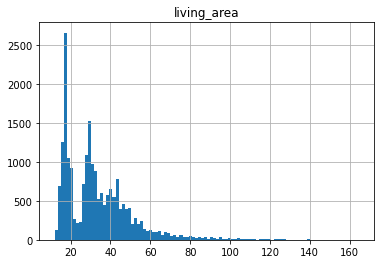

In [145]:
data.hist(column = "living_area", bins = 100)

Тут два ярко выраженных пика в районе 18-30 кв. м. И длинный "хвост" до, примерно, 165 кв. м. В принципе логично, этот показатель соотносится с общей площадью.

In [146]:
data["living_area"].unique()

array([ 51. ,  18.6,  34.3,   nan,  32. ,  14.4,  15.4,  43.6,  20.3,
        31. ,  30. ,  27. ,  17. ,  20.5,  55.6,  16.5,  19.4,  76. ,
        48. ,  16.9,  17.7,  46.5,  39. ,  43. ,  49. ,  20.8,  52. ,
        38.1,  51.6,  14. , 104. ,  16.3,  29.7,  15. ,  59. ,  80.9,
        28. ,  30.3,  42.5,  18. ,  25.4,  38. ,  94. ,  33.7,  18.1,
        19. ,  48.8,  68. ,  29. ,  17.4,  44. ,  28.9,  16. ,  35.5,
        44.8,  21. ,  38.4,  43.5,  42.6,  45.2,  27.5,  27.8,  36. ,
        18.4,  40. ,  45. ,  20. ,  15.6,  28.1,  77. ,  55.1,  67. ,
        12. ,  61. ,  79.4,  73. ,  46. ,  27.4,  45.4,  55.9,  16.7,
        86. ,  31.5,  45.1,  48.5,  30.5,  31.9,  19.5,  41.9,  15.1,
        25.6,  48.4,  18.5,  49.6,  15.5,  29.2,  97.2,  42.9,  31.2,
        34. ,  40.6,  37.8,  18.9,  40.1,  15.9,  43.4,  51.8,  47.4,
        57.7,  17.5,  89.1,  89.4,  72.4,  17.9,  38.7,  44.1,  27.7,
        26.1,  29.8,  41.5,  39.7,  19.2,  50. ,  16.1,  60.3,  89. ,
        14.5,  43.2,

In [147]:
data["living_area"].min()

12.0

In [148]:
data["living_area"].max()

164.7

In [149]:
data.loc[data["living_area"] < 12.1, "living_area"].value_counts()

12.0    28
Name: living_area, dtype: int64

В данном столбце оказалось несколько аномально низких значений. Возможно, это ошибка либо в записи, либо техническая, но таких низких значений обычно не бывает. Но в целом данные совпадают с общей площадью.

**Сортировка по площади кухни.**

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

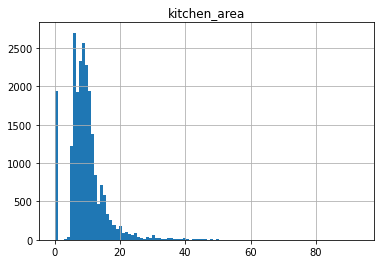

In [150]:
data.hist(column = "kitchen_area", bins = 100)

Большая часть площадей кухонь находится в районе 8-12 кв. м. Стандартная площадь типовой застройки. Длинный "хвост" до 60 кв. м относится к дорогим квартирам, хотя кухня в 60 кв. м - это очень необычно. Возможно, это ошибка. То же самое касается нулевых значений.

Самая маленькая стандартная кухня - это 6-8 кв. м. Максимальный размер кухни может быть разным, особенно в дорогих новостройках. Может быть и 20 кв. м.

In [151]:
data.loc[data["kitchen_area"] < 6.0, "kitchen_area"].value_counts()

0.00    1935
5.50     395
5.00     340
5.40     135
5.60     135
        ... 
5.28       1
5.35       1
5.31       1
5.86       1
5.65       1
Name: kitchen_area, Length: 61, dtype: int64

In [152]:
data.loc[data["kitchen_area"] > 20, "kitchen_area"].value_counts()

25.0    56
30.0    53
22.0    50
23.0    36
21.0    34
        ..
42.6     1
27.2     1
37.8     1
27.5     1
29.8     1
Name: kitchen_area, Length: 244, dtype: int64

Тут есть явно аномально малые значения в виде 2, 3 и 4 кв. м. Обычно санузел такого размера бывает. При этом, значений меньше 6 кв. м достаточно много. Также много необычно больших значений. Но в целом, графики соотносятся друг с другом и площадь кухни соответствует общей и жилой площади.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

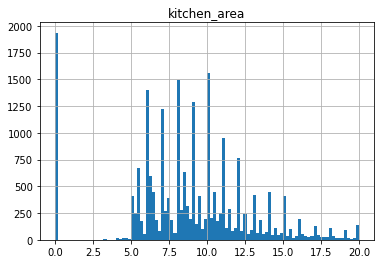

In [153]:
data.hist(column = "kitchen_area", bins = 100, range = (0, 20))

Большинство значений находятся между 5,5 кв. м и 12 кв. м. Эти значения ближе к реальным.

**Сортировка по цене.**

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

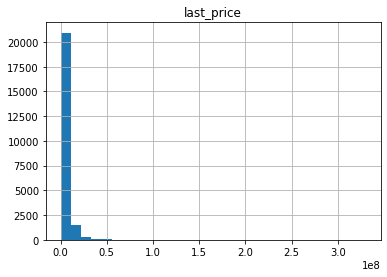

In [154]:
data.hist(column = "last_price", bins = 30)

Тут явно аномальное значение около нуля.

In [155]:
data["last_price"].min()

500000.0

In [156]:
data["last_price"].max()

330000000.0

Попробуем уточнить

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

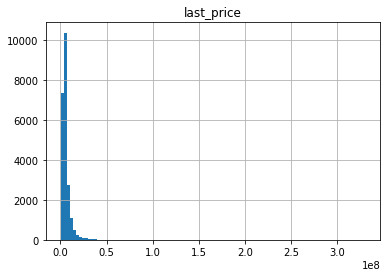

In [157]:
data.hist(column = "last_price", bins = 100)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

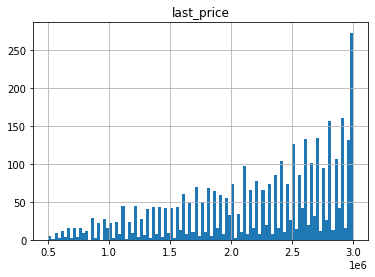

In [158]:
data.hist(column = "last_price", bins = 100, range = (500000, 3000000))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

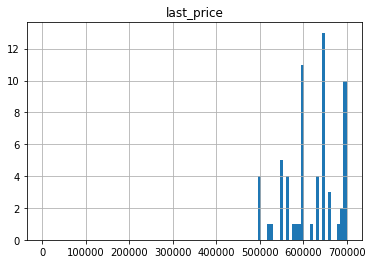

In [159]:
data.hist(column = "last_price", bins = 100, range = (0, 700000))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

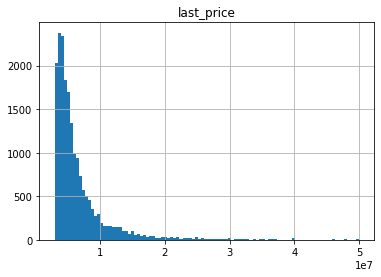

In [160]:
data.hist(column = "last_price", bins = 100, range = (3000000, 50000000))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

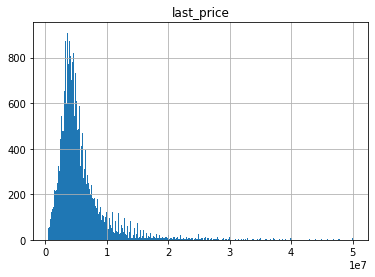

In [161]:
data.hist(column = "last_price", bins = 300, range = (500000, 50000000))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

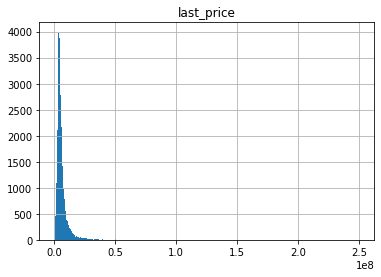

In [162]:
data.hist(column = "last_price", bins = 300, range = (500000, 250000000))

In [163]:
data["last_price"].value_counts()

4500000.0     341
3500000.0     289
4300000.0     259
4200000.0     256
4000000.0     254
             ... 
22450000.0      1
1760000.0       1
7907820.0       1
680000.0        1
4386000.0       1
Name: last_price, Length: 2798, dtype: int64

In [164]:
data.loc[data["last_price"] > 10000000, "last_price"].value_counts()

10500000.0    64
12000000.0    57
11000000.0    51
11500000.0    47
12500000.0    45
              ..
21071500.0     1
14850000.0     1
19471000.0     1
10635000.0     1
13705200.0     1
Name: last_price, Length: 830, dtype: int64

По полученным данным видно, что такой сильный сдвиг влево возник из-за крупного масштаба первой гистограммы и очень больших верних значений, которые и влияют на масштаб. В целом можно сказать, что большинство квартир стоят в районе 4-5 млн. руб. Дальше количество квартир со стоимостью до 10 млн. начинает резко снижаться. Количество более дорогих квартир чаще всего не превышает 10 и, в целом, колеблется около нуля. Цена в виде 240 млн. руб. может быть ошибкой, а может быть и реальной. Такие квартиры тоже встречаются.

**Сортировка по количеству комнат.**

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

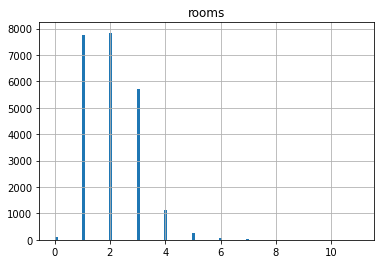

In [165]:
data.hist(column = "rooms", bins = 100)

Тут, в принципе, всё стандартно. Больше всего 1-комантных и 2-комнатных квартир, которых даже чуть больше, чем 1-комнатных. И вот это необычно. Так, по идее, не должно быть. Эти показатели также подтверждают данные столбца с жилой площадью. Площадь до 30 кв. м характерна для квартир, которых в этом стобце большинство. Дальше их количество уменьшается. 4-комантных и 5-комантных вообще относительно немного построено по сравнению с более маленькими квартирами. Ещё большее количество комнат - редкость.

**Сортировка по высоте потолков.**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

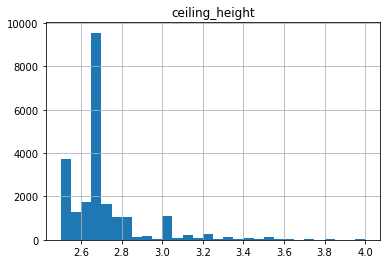

In [166]:
data.hist(column = "ceiling_height", bins = 30)

Большое разнообразие по высоте потолков, которое зависит от многих факторов: от типа дома (его серия, время постройки, категория жилья и т.д.) от ремонта, от того, насколько верно посчитали высоту, и т.д. Основное количество находится в районе 2,5 м и 2,8 м. Есть два пика на 2,5 м и 2,7 м. Это соответствует стандартной высоте в типовой планировке. После 2.8 м идёт резкое снижение. Есть небольшй подъём на 3 м.

**Сортировка по этажу.**

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

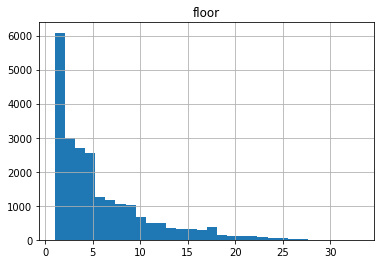

In [167]:
data.hist(column = "floor", bins = 30)

Большинство квартир предлагают на 1-5 этажах. Дальше идёт идёт второй блок, который значительно меньше предыдущего, это квартиры на 6-10 этажа. Эти данные свидетельствуют о том, что большинство квартир, продаётся в домах массовой, скорее всего советской, застройки.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

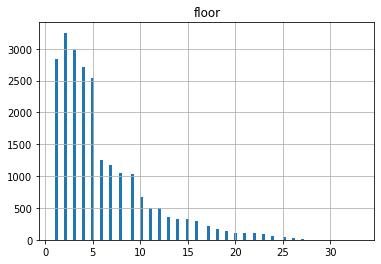

In [168]:
data.hist(column = "floor", bins = 100)

Так будет более наглядно. Большинство квартир продаётся на указанных этажах, дальше идёт постепенное снижение количества объявлений.

**Сортировка по типу этажа.**

In [169]:
data["floor_type"].value_counts()

Другой       16866
Последний     3195
Первый        2832
Name: floor_type, dtype: int64

Тут всё логично. На первом этаже квартир предлагают меньше, чем на последнем. Первый этаж обычно менее популярен, чем другие. Кроме этого, на первых этажах домов часто распологаются коммерческие помещения.

**Сортировка по общему количеству этажей в доме.**

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

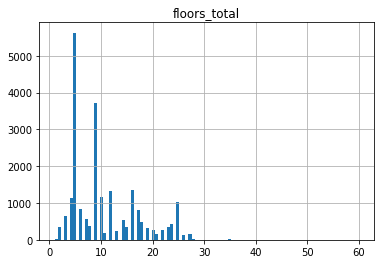

In [170]:
data.hist(column = "floors_total", bins = 100)

Больше всего квартир продаётся в 5-этажных и 9-этажных домах. Стандартная этажность для советской застройки. Таких домов больше всего (особенно это касается области), поэтому и квартир в таких домах продаётся больше всего. Домов с большей этажностью строилось меньше, а высокие в 20-25 этажей стали строить сейчас.

**Сортировка по расстоянию о центра города.**

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

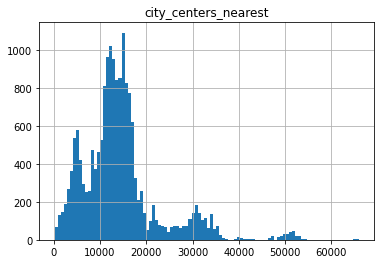

In [171]:
data.hist(column = "city_centers_nearest", bins = 100)

Выделяются два пика: примерно в районе 3-5 км и в районе 12-15 км. Влияние тут оказывают объявления из Санкт-Петербурга, которых большинство. На расстоянии 3-5 км от центра начинаются жилые районы с массовой застройкой (советская и современная). Это же касается и городов в области. Кроме этого, по окраинам начинается очень массовая современная застройка с очень большими жилыми комплексами по 20-25 этажей и огромным количеством квартир. А на расстоянии 12-15 км влияние начинают оказывать квартиры, находящиеся в населённых пунктах, расположенных в области. Тут, как уже было отмечено выше, не совсем понятен алгоритм рассчёта расстояния от центра.

**Сортировка по растоянию до ближайшего аэропорта.**

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

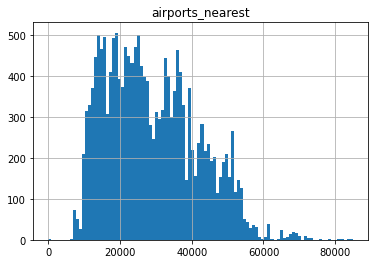

In [172]:
data.hist(column = "airports_nearest", bins = 100)

Два пика: в районе 18-22 км и в районе 35-38 км. В первом случае речь, скорее всего, идёт о квартирах в Санкт-Петербурге, а во втором - в области.

**Сортировка по расстоянию до ближайшего парка.**

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

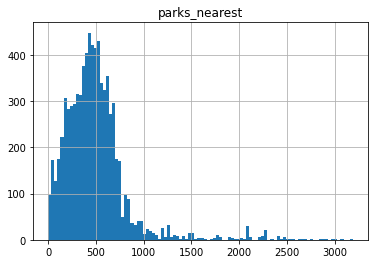

In [173]:
data.hist(column = "parks_nearest", bins = 100)

Сильное смещение влево. Большинство значений группируются в диапазоне до 500 м. Тут также, скорее всего, влияние оказывают объявления из Санкт-Петербурга. Дальше их количество снижается.

**Сортировка по дню и месяцу публикации объявления.**

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

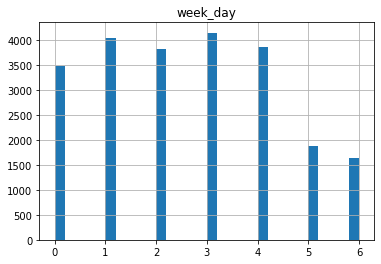

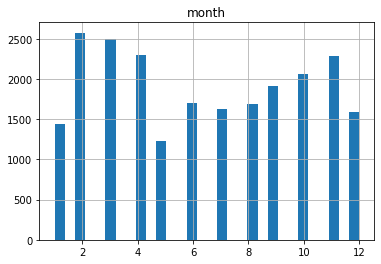

In [174]:
data.hist(column = "week_day", bins = 30)
data.hist(column = "month", bins = 30)

Тут никаких особенностей нет. Большинство объявлений подаются в будние дни и гораздо меньше в выходные. Что касается месяца подачи объявлений, то тут преобладают февраль, март и апрель, далее идут сентябрь (даже со второй половины августа), октябрь и ноябрь. Это укладывается в общую схему. После праздников люди начинают решать свои жилищные вопросы. Также после отпусков - осенью - начинают более активно заниматься недвижимостью. адение количества объявлений в декабре объясняется тем, что кто успел продать квартиру, тот продал, а остальные оставили решение этого вопроса на следующий год.

**Изучение того, как быстро продавались квартиры.**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

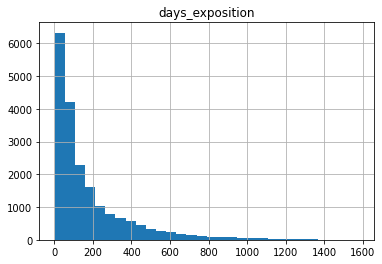

In [175]:
data.hist(column = "days_exposition", bins = 30)

Пока не очень понятно. Попробуем уменьшить масштаб.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

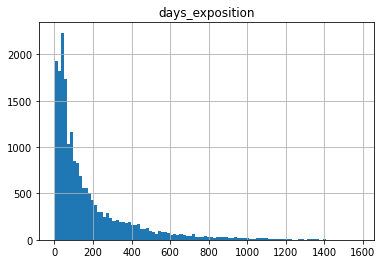

In [176]:
data.hist(column = "days_exposition", bins = 100)

In [177]:
data["days_exposition"].min()

1.0

In [178]:
data["days_exposition"].max()

1580.0

Квартиры продаются от 1 дня, до почти 4 лет. В принципе, оба варианта возможны, как возможен и тот вариант, когда 1 день - это аномальное значение, а те, что почти 4 года, просто забыли снять с публикации. Также такой короткий срок, возможно, связан с тем, что человек подал объявление, а потом передумал и снял его. Нельзя исключать и того, что квартира, действительно так быстро продалась. Также возможен вариант чисто технической ошибки.
Наибольшее количество объявлений приходится на период до 200 дней.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

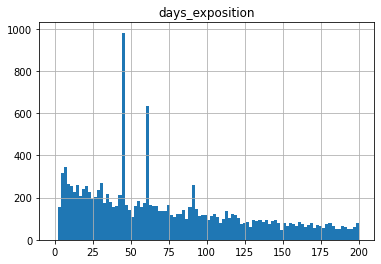

In [179]:
data.hist(column = "days_exposition", bins = 100, range = (0, 200))

На уточнённых данных выделяются несколько пиков, находящихся в районе 10, 30, 45, 60 дней, а также примерно, около 80 дня.

In [180]:
data.loc[data["days_exposition"] <= 10, "days_exposition"].value_counts()

7.0     227
4.0     170
3.0     153
5.0     148
9.0     135
8.0     131
10.0    126
6.0     120
2.0       2
1.0       1
Name: days_exposition, dtype: int64

Продажи за 1 и 2 дня - это скорее всего ошибка. Возможно, имелось ввиду 10 и 20 дней. Впрочем, как было указано выше, варианты и 1 день и 4 года вполне возможны. Всё зависит от разных факторов. Например, что эта за квартира, где находится, насколько собственник, действительно, готов её продать, готов ли торговаться и т.д.

Уточним. Сделаем срез значений.

In [181]:
data.loc[(data["days_exposition"] > 10) & (data["days_exposition"] <= 200), "days_exposition"].value_counts()

45.0     850
60.0     532
30.0     203
90.0     190
14.0     140
        ... 
187.0     24
200.0     23
192.0     22
198.0     20
148.0     15
Name: days_exposition, Length: 190, dtype: int64

Что и требовалось доказать. Большинство продаж происходит в указанные дни. Данные уточнились, теперь можно сказать, что пиковые значения приходится на 7, 30, 45, 60 и 80 дней. Большая часть продаж квартир происходит от одной недели до 1,5, 2 месяцев, что подтверждается практикой, так же, как и пиковые значения. Тут надо смотреть период, в какой продавалась квартира. В эти годы был кризис, цены росли или были скачки цен, активность на рынке недвижимости увеличилась. Можно говорить о том, что большнство квартир публикуются в диапазоне от 3 до 60 дней.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

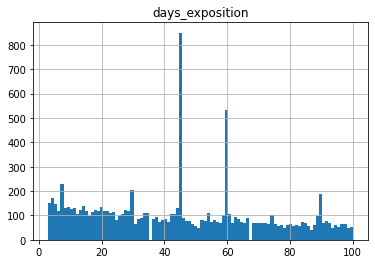

In [182]:
data.hist(column = "days_exposition", bins = 100, range = (3, 100))

Выделяются пики на, примерно, 7, 30, 45 и 60 дне. Также добавился пик в районе 90 дня. Показатели, в принципе, соответствуют более ранним.

Посчитаем среднее значение и медиану.

In [183]:
data["days_exposition"].mean()

180.53431570448123

In [184]:
data["days_exposition"].median()

95.0

На среднее значение влияние оказывают крайние значения в виде 2 дней и 4 лет.

In [185]:
days_exposition_mean = data.query("days_exposition >= 7 and days_exposition <= 60")

In [186]:
days_exposition_mean["days_exposition"].mean()

34.08639787328312

In [187]:
days_exposition_mean["days_exposition"].median()

35.0

Если сравнить значения между пиками, то среднее и медиана будут практически равны. Отсюда можно сделать вывод, что в среднем квартира продаётся чуть больше месяца, что также подверждается практикой. Значения меньше и больше крайних пиков следует признать особенными, так как на них оказывают влияние сторонние факторы.

На основании полученных данных можно сделать вывод, что чаще всего квартира продаётся в течении 1, 2 месяцев, основные продажи приходятся на 45 и 60 дней. Тут следует учесть, что люди часто не сразу снимают с публикации объявления, а в данном столбце показано именно общее количество дней в публикации, поэтому часть данных может быть неточными. Также нужно принять во внимание, что 45 и 60 дней - это стандартный срок размещения бесплатного объявления на Яндекс.Недвижимость в зависимотси от категории. Собственники могут продать квартиру, а объявление потом снимается автоматически по истечении срока. Если принять во внимание этот фактор, а также практику, то время продажы квартир примерно равно среднему и медианному значению (33 дня). Если квартира продаётся быстрее этих значений, то можно считать, что она продана быстро, если более (особенно, если больше 1,5, 2 месяцев), то это значит, что квартира начинает зависать, если нет каких-то дополнительных факторов (квартира особенная, собственник не торопится её продавать, квартира продана, но объявление забыли снять и т.д.).

**Исследование факторов, которые больше всего влияют на стоимость объекта**

**Общая площадь**

In [188]:
data["total_area"].corr(data["last_price"])

0.6595251698930812

<AxesSubplot:xlabel='total_area'>

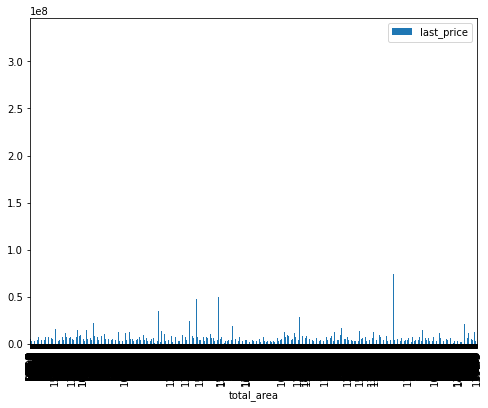

In [189]:
data.plot(x = "total_area", y = "last_price", kind = "bar", figsize = (8, 6))

Тут мало что понятно. Всё из-за очень больших значений площади и цены. Попробуем взять меньший диапазон. На основании ранее полученных данных, можно сделать вывод, что большинство кватир находится в диапазоне до 100 кв. м и до 10 млн. руб. Однако, пиковые значения приходятся на 50 кв. м и 5 млн. руб. Для поиска возможной зависимости, этого будет достаточно. Также возьмём только квартиры из Санкт-Петербурга, площадью 45 кв. м и расположенные не в центре.

In [190]:
last_price = data.query('total_area <= 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [191]:
last_price = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

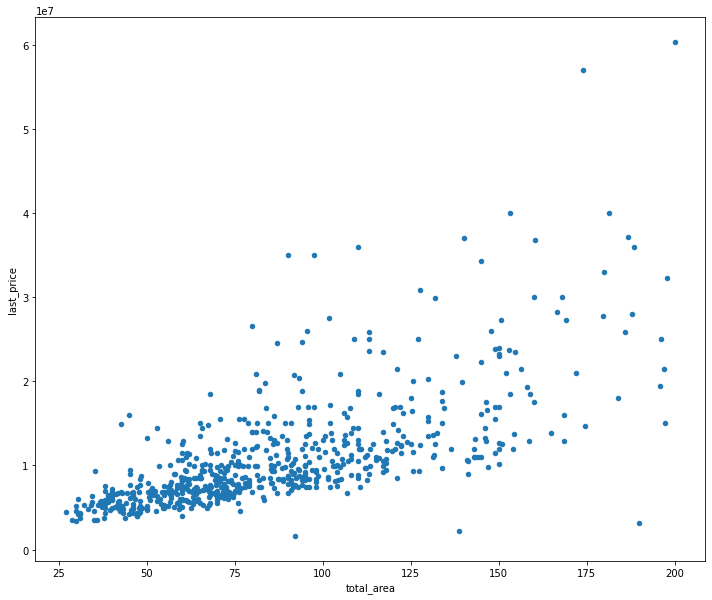

In [192]:
last_price.plot(x = "total_area", y = "last_price", kind = "scatter", figsize = (12, 10))

Если не брать во внимание выброс, то тенденция очевидна - при увеличении площади, растёт и цена. Это показывает и расчёт корреляции - она ближе к единице.

**Жилая площадь**

In [193]:
data["living_area"].corr(data["last_price"])

0.5409103024408715

Здесь соотношение меньше, чем с жилой площадью. Это логично. Прежде всего люди смотрят общую площадь и по ней, прежде всего,устанавливается цена.

Больше всего квартир с жилой площадью до 50 кв. м с пиком на 30 кв м.

In [194]:
last_price1 = data.query('living_area <= 30 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [195]:
last_price1 = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

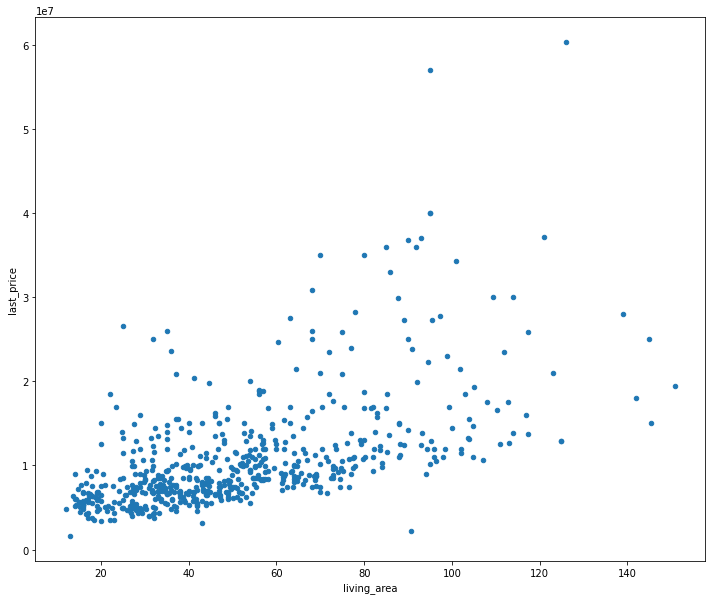

In [196]:
last_price1.plot(x = "living_area", y = "last_price", kind = "scatter", figsize = (12, 10))

Та же самая тенденция и тот же самый выброс, что и с общей площадью. Диаграммы очень схожи. Данное сходство уже подтверждалось ранее. Тем не менее, зависимость цены от площади здесь не такая выраженная как с общей площадью.

**Площадь кухни**

In [197]:
data["kitchen_area"].corr(data["last_price"])

0.44031809598723376

Большая часть кухонь находится в промежутке между 8 кв. м и 12 кв. м.

In [198]:
last_price2 = data.query('kitchen_area <= 12 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [199]:
last_price2 = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

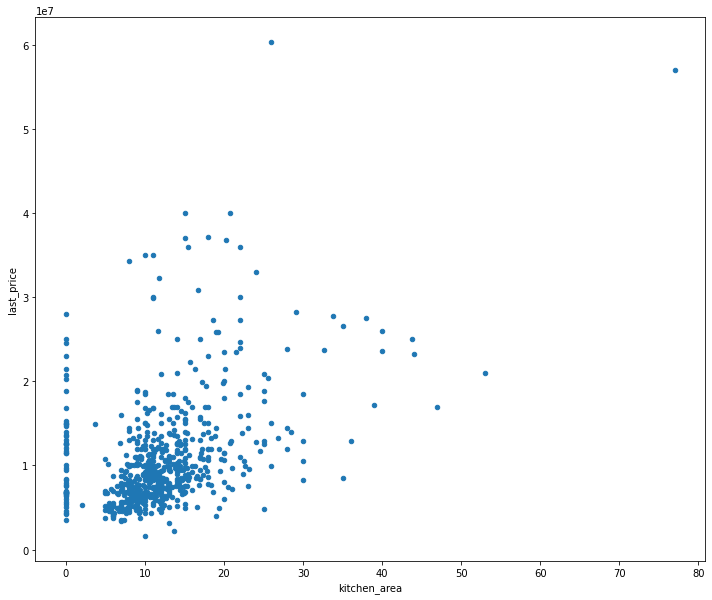

In [200]:
last_price2.plot(x = "kitchen_area", y = "last_price", kind = "scatter", figsize = (12, 10))

Тенденция та же, что и раньше. С увеличением площади, увеличивается и цена. Однако, вполне вероятно, что это не связано напрямую с площадью кухни. Зависимость цены от площади здесь минимальная. Скорее всего, тут на цену влияет общая площадь. При увеличении площади квартиры, площадь кухни (как и жилая площадь) обычно тоже увеличивается. Это также подтверждает и схожесть всех трёх диаграмм.

**Количесто комнат**

In [201]:
data["rooms"].corr(data["last_price"])

0.3768338810989428

Тут самый низкий показатель. И это логично. Общая цена квартиры зависит от цены 1 кв. м и поэтому именно общая площадь влияет на стоимость. При этом, количество комнат, пусть и не напрямую, но связано с общей площадью квартиры.

**Тип этажа**

In [202]:
floor_type = data.groupby("floor_type")["last_price"].median()

In [203]:
floor_type

floor_type
Другой       4850000.0
Первый       3950000.0
Последний    4300000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='floor_type'>

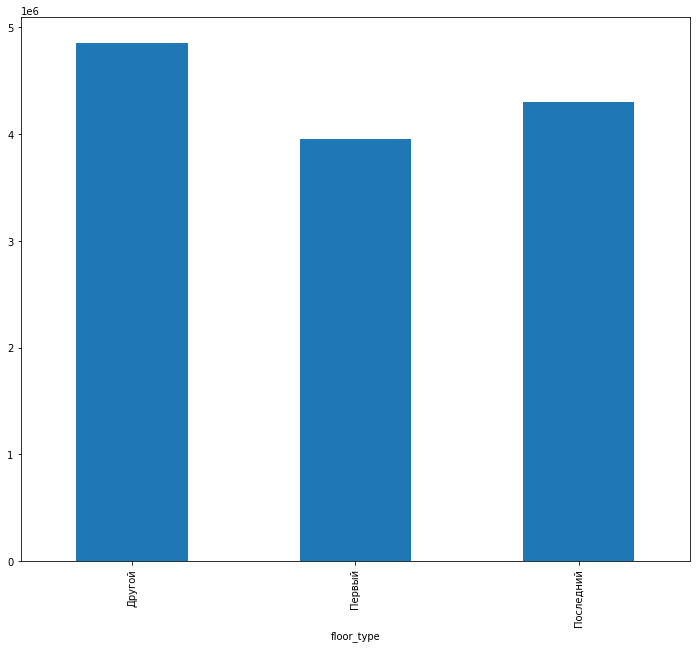

In [204]:
floor_type.plot(x = "floor_type", y = "last_price", kind = "bar", figsize = (12, 10))

Этот график подтверждает известные данные. Дороже всего стоят квартиры, раположенные на средних этажах. А дешевле всех на первом и последнем. При этом, на первом - дешевле всего.

**Дата размещения**

Дя анализа возьмём год и месяц. День недели на формирование цены никак не влияет. Отберём квартиры общей площадью 45 кв. м, расположенных в Санкт-петербурге и на расстоянии 3-5 км от центра.

In [205]:
date_exposition_year = data.query('total_area == 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [206]:
date_exposition_year = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

<AxesSubplot:xlabel='year'>

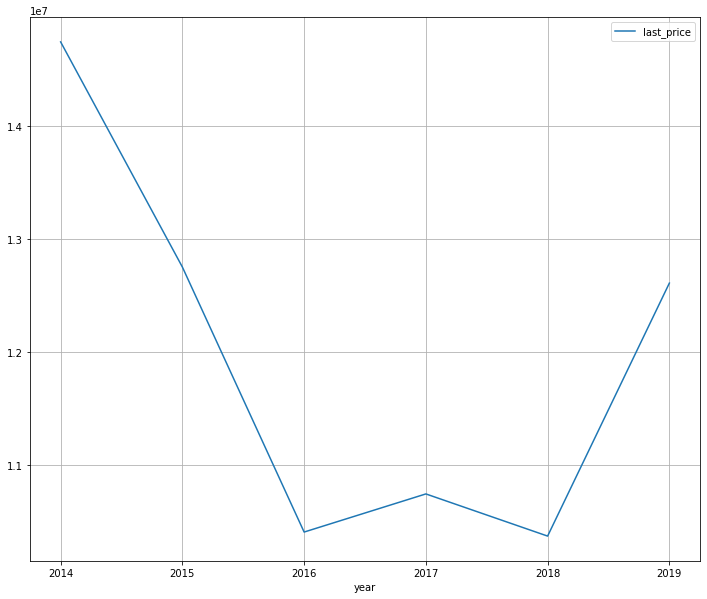

In [207]:
date_exposition_year.pivot_table(index = "year", values = "last_price").plot(grid = True, figsize = (12, 10))

В 2014 году началось падение цен продолжалось  до 2016 года. Далее, есть небольшой рост в 2017 году и снова понижение в 2018 году. С 2019 года начинается уверенный рост.

Рассмотрим по месяцам. Для этого возмём 2019 год, как год с уверенным ростом цен после падения в предыдущие годы.

In [208]:
date_exposition_month = data.query('total_area == 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [209]:
date_exposition_month = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

In [210]:
date_exposition_month = data.query('year == 2019')

<AxesSubplot:xlabel='month'>

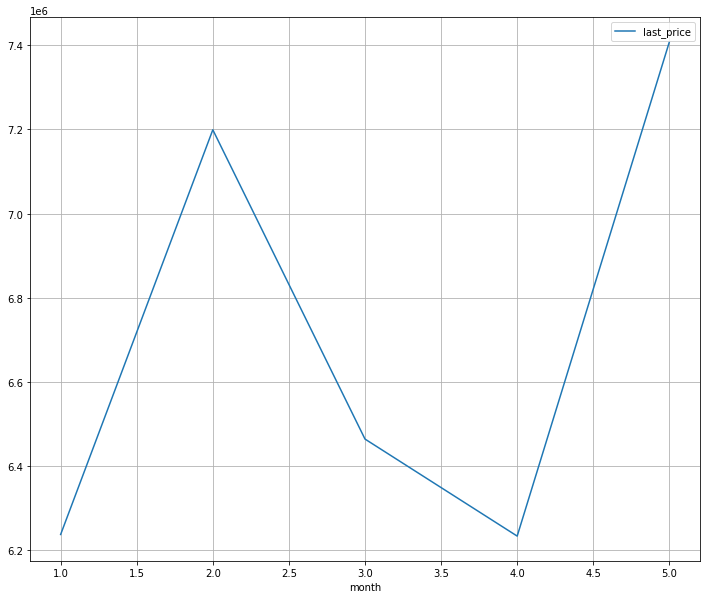

In [211]:
date_exposition_month.pivot_table(index = "month", values = "last_price").plot(grid = True, figsize = (12, 10))

Тут данные не совсем понятны. Если смотреть на показатели, то, как-будто, только первый квартал. Данные за 2019 год предоставлены не полностью?

Попробуем взять 2015 год.

In [212]:
date_exposition_month = data.query('total_area == 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [213]:
date_exposition_month = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

In [214]:
date_exposition_month = data.query('year == 2015')

<AxesSubplot:xlabel='month'>

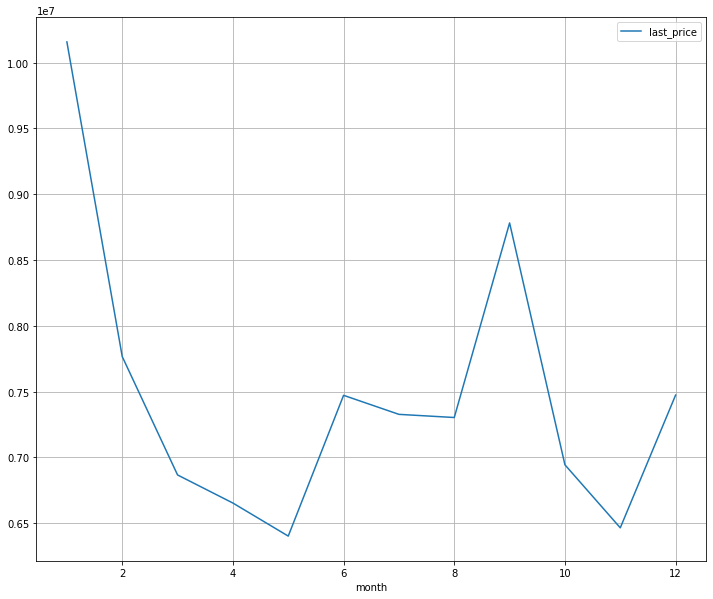

In [215]:
date_exposition_month.pivot_table(index = "month", values = "last_price").plot(grid = True, figsize = (12, 10))

Тут творится хаос. В этот год был кризис и данные тут не могут быть показательны. То же самое касается и следующих годов. Возьмём 2014 г.

In [216]:
date_exposition_month = data.query('total_area == 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [217]:
date_exposition_month = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

In [218]:
date_exposition_month = data.query('year == 2014')

<AxesSubplot:xlabel='month'>

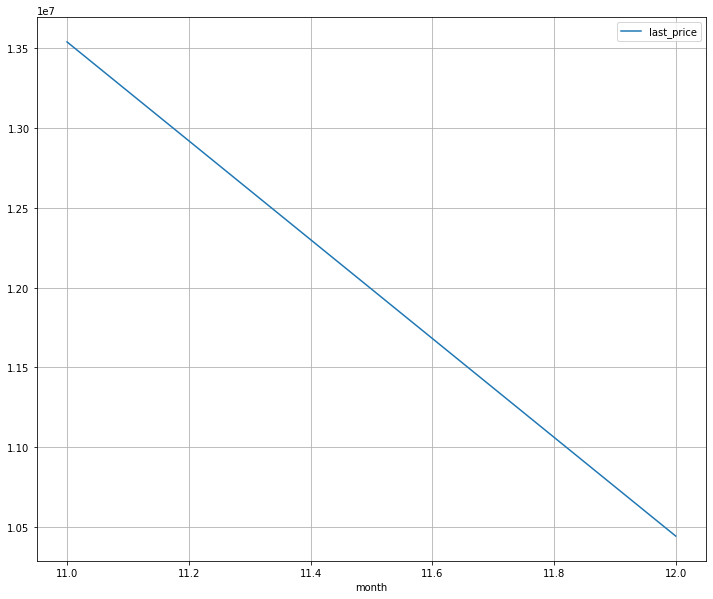

In [219]:
date_exposition_month.pivot_table(index = "month", values = "last_price").plot(grid = True, figsize = (12, 10))

Тут данные тоже неполные. Посмотрим 2018 год.

In [220]:
date_exposition_month = data.query('total_area == 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [221]:
date_exposition_month = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

In [222]:
date_exposition_month = data.query('year == 2018')

<AxesSubplot:xlabel='month'>

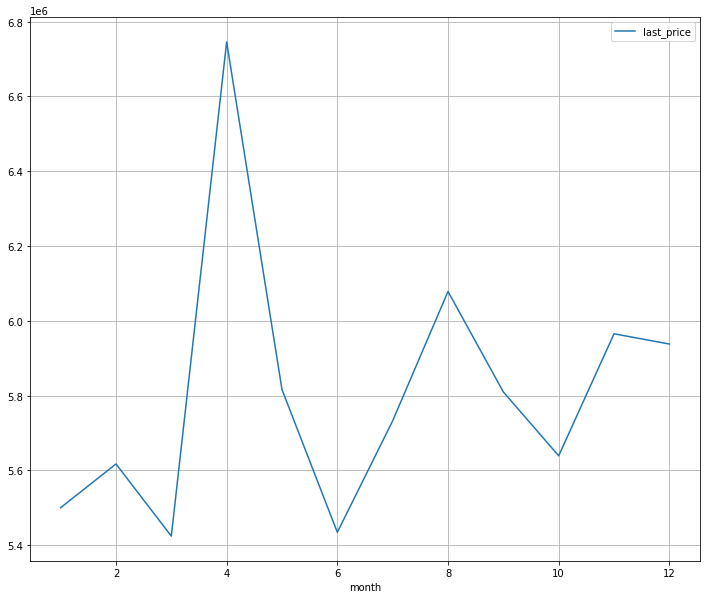

In [223]:
date_exposition_month.pivot_table(index = "month", values = "last_price").plot(grid = True, figsize = (12, 10))

Поскольку в этот год на цены на недвижимость ещё влиял предыдущий кризис, то цены были нестабильны, но, в целом укладывались в общую схему. К весне наблюдался рост, который достиг пика в апреле, после чего начинается снижение. Дальше, в 4 квартале, согласно схеме, должен был начаться рост (и в первом расчёте так и было). В данном случае наблюдаются скачки. Возможно, это было связано с общей стабилизацией и начинающимся ростом цен.

Добавим ещё расчёт по дню недели. Возьмём 2019 год, когда цены росли.

Общую площадь возьмём также 45 кв. м.

In [224]:
date_exposition_day_week = data.query('total_area == 45 and last_price <= 5000000 and locality_name == "Санкт-Петербург"')

In [225]:
date_exposition_day_week = data.query("centers_nearest_km > 3 and centers_nearest_km < 5")

In [226]:
date_exposition_day_week = data.query('year == 2019')

<AxesSubplot:xlabel='week_day'>

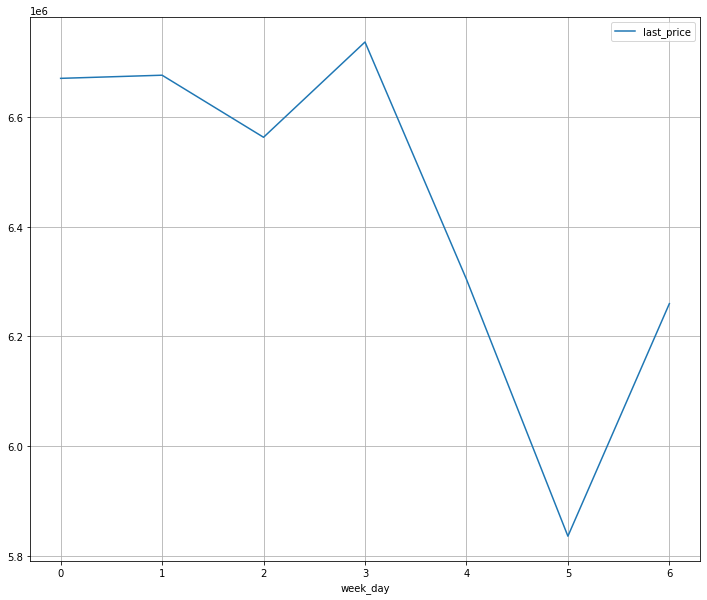

In [227]:
date_exposition_day_week.pivot_table(index = "week_day", values = "last_price").plot(grid = True, figsize = (12, 10))

Данные на этом графике соответствуют графику публикации объявлений по дням недели. Собственно, этот график от того гарфика и зависит. Пик публикации объявлений приходится на понедельник, дальше идёт снижение и достигает минимума к выходным. К понедельнику снова начинается рост.

**Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [228]:
cities = data.pivot_table(index = "locality_name",
                          values = "price_avg",
                          aggfunc = ["count", "mean"]).reset_index()

In [229]:
cities.columns = ["city", "item", "price_avg"]

In [230]:
cities10 = cities.sort_values(by = "item", ascending=False).head(10)

In [231]:
cities10

,city,item,price_avg
295,Санкт-Петербург,15210,113303.946483
188,Посёлок Мурино,495,84322.637172
248,Посёлок Шушары,431,78047.964501
3,Всеволожск,391,68710.544246
294,Пушкин,359,103029.985794
117,Колпино,335,75258.550746
195,Посёлок Парголово,324,90461.201852
6,Гатчина,305,68796.480984
43,Деревня Кудрово,273,91786.975092
4,Выборг,228,57753.128509


In [232]:
max_price = cities10[cities10.price_avg == cities10.price_avg.max()]
min_price = cities10[cities10.price_avg == cities10.price_avg.min()]

In [233]:
max_price

,city,item,price_avg
295,Санкт-Петербург,15210,113303.946483


In [234]:
min_price

,city,item,price_avg
4,Выборг,228,57753.128509


Отобраны 10 населённых пунктов с наибольшим количеством объявлений, в них посчитана средняя цена кв. м. Отобраны населённые пункты с наибольшей и наименьшей стоимость кв. м.

**Изменение цены квартиры в зависимости удаления от центра**

In [235]:
data["price_km"] = data["last_price"] / data["centers_nearest_km"]

In [236]:
data["price_km"] = data["price_km"].round(1)

<AxesSubplot:xlabel='centers_nearest_km'>

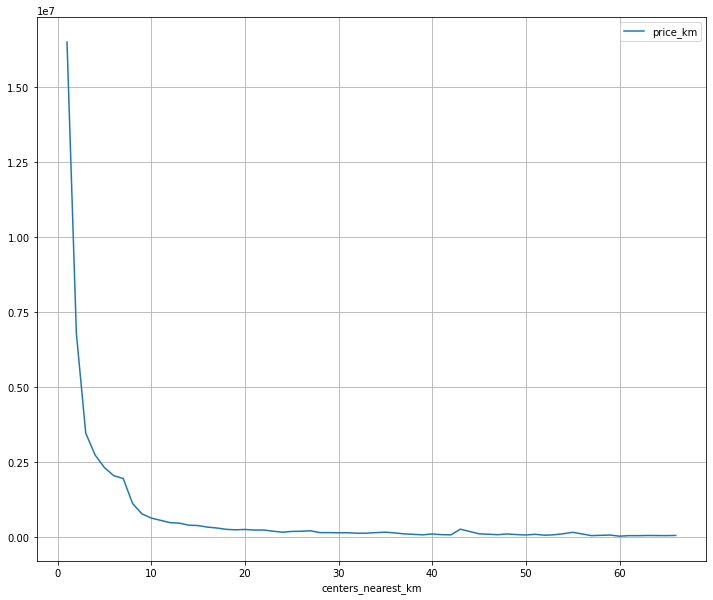

In [237]:
data.pivot_table(index = "centers_nearest_km", values = "price_km", aggfunc = "mean").plot(grid = True, figsize = (12, 10))

Посмотрим конкретно Санкт-Петербург.

In [238]:
price_km = data.query('locality_name == "Санкт-Петербург"')

<AxesSubplot:xlabel='centers_nearest_km'>

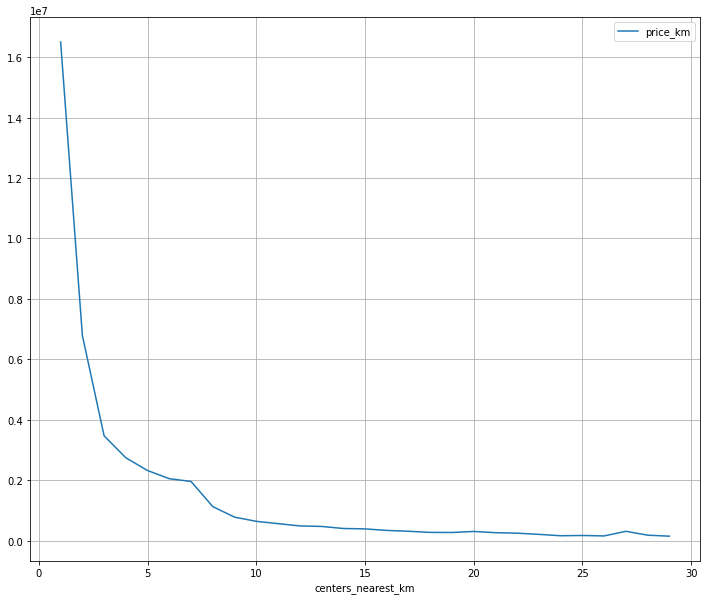

In [239]:
price_km.pivot_table(index = "centers_nearest_km", values = "price_km", aggfunc = "mean").plot(grid = True, figsize = (12, 10))

Картина идентичная. Собственно на неё, в основном, и влияют объвления из Санкт-Петербурга. По мере удаления от центра, цена уменьшается.

### Общий вывод

В итоге можно делать вывод о следующем. Большинство квартир, как и следовало ожидать, находятся в Санкт-Петербурге, доля таковых составляет более 50%. Самая высокая цена 1 кв. м, как и следовало ожидать, там же, самая низкая в г. Выборге. Наиболее распространённым типом квартир, являются квартиры площадью 40 и 50 кв., расположенные на средних этажах 5-этажных и 9-этажных домов. Есть основания предположить, что здесь, в основном преобладает типовая советская застройка, так как современные жилые комплексы, чаще всего, выше по этажности. Дорогое современное жильё с небольшим количеством этажей составляет небольшой процент и на общий показатель значительного вляния не оказывают. Большинство составляют 1-комантные и 2-комнатные квартиры, стоимостью 4-5 млн. руб. Наиболее дорогие квартиры находятся ожидаемо в центре. Наименьший спрос приходится на квартиры, расположенные на первом и последнем этажах, пр этом, на первй этаж спрос ниже, чем на последний.

Средняя скорость продажи квартиры составляет 33 дня. Наибольшая активность в продажах недивижимости приходится на 2 и 4 кварталы года. Что касается ценообразования, то стоимость обычно снижется весной, после чего начинает расти на протяжении всего 2 квартала, далее, летом цена снижается, после чего с новым увеличением активности, начинает снова расти и достигает максимальных значений к концу 4 квартала. Есть некоторое расхождение между показателями наиболее активной подачи объявлений (оно начинается, примерно, на месяц раньше) и ростом цены на жилую недвижимость. Связано это с тем, что вначале люди, начав решать свои жилищные вопросы, выкладывают много объявлений о продаже, а спрос при этом отстаёт. Далее, при росте спроса, начинает расти и цена.